In [22]:
import sidetable
import urllib3
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlas
import matplotlib
from IPython.display import display
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

csv_path = 'attacks.csv'
def import_load_data(csv_path=csv_path, encoding="ISO-8859-1"):
    df = pd.read_csv(csv_path, encoding=encoding)
    return df

In [23]:
def clean_functions():
    print("The clean functions are:")
    print("import_load_data(csv_path=csv_path, encoding=\"ISO-8859-1\")")
    print("Load data.")
    print("first_view(df=df)")
    print("Overview of the data.")
    print("first_transformation(df=df, drop_rate = None)")
    print("Standarize the Dataframe and first study about missing values.")
    print("drop_columns_nans(df=df, max_nan=0, subset=None, keep=\"first\")")
    print("Drop duplicated, and missing values in columns and rows. Clean also non statistical columns")
    print("col_to_num(col, type=\"float64\", fill=\"nan\")")
    print("Transform columns to numeric and fill na")
    print("categorical_search(df=df):")
    print("Overview to see wich column could be a categorical column")
    print("stand_categorical(col, pattern, other= None)")
    print("Transform a column to categorical and clean it fill it with other or mode" "Pattern must see like below")
    print("""pattern = [(df[\"sex\"].str.contains(\"m\", case=False, regex=False, na=False), \"m\"),
           (df[\"sex\"].str.contains("f", case=False, regex=False, na=False), "f"),
           (df["sex"].str.contains("n", case=False, regex=False, na=False), "n")]""")   
    print("clean_datetime(col, new_columns=False)")
    print("Transform column to datetime and add new columns if needed")
    print("fill_all(df=df, fill=\"median\")")
    print("Fill missing numeric columns with median or mean")

In [24]:
df = import_load_data()
df_original = df

In [25]:
def first_view(df=df):
    display(df.info())
    print("---------------------------------------------------------------------------")
    display(df.describe().T)
    print("---------------------------------------------------------------------------")
    display(df.head())
    print("---------------------------------------------------------------------------")
    df.hist(bins=50, figsize =(20,15))
    plt.show()
    




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

None

---------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


---------------------------------------------------------------------------


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


---------------------------------------------------------------------------


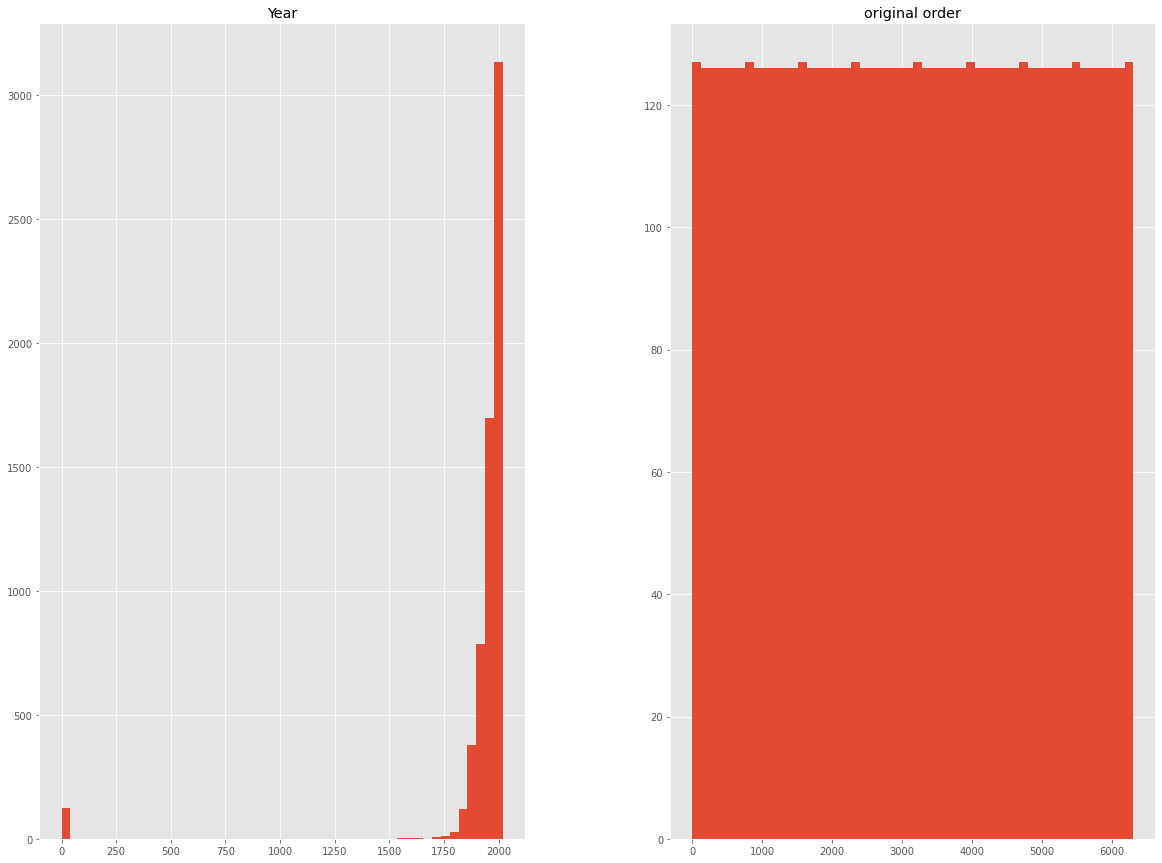

In [26]:
first_view()

In [6]:
def first_transformation(df=df, drop_rate = None):
    #strip y lower
    df = df.applymap(lambda s:s.lower() if type(s) == str else s)
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    instant_df = pd.DataFrame()
    cols = df.columns
    for col in cols:
        pct_missing = np.mean(df[col].isnull())
        print(f"{col} - {round(pct_missing*100)}%")
        missing = df[col].isnull()
        num_missing = np.sum(missing)
        if num_missing > 0:
            instant_df[f"{col}_is_missing"] = missing
        else:
            instant_df[f"{col}_is_missing"] = 0
    is_missing_cols = [col for col in instant_df.columns if "is_missing" in col]
    instant_df["num_missing"] = instant_df[is_missing_cols].sum(axis = 1)
    if len(cols) < 30:
        colors = ["#000099", "#ffff00"]
        sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))
    else:
        instant_df["num_missing"].value_counts().reset_index().sort_values(by="index").plot.bar(x = "index", y = "num_missing")
    return df


case number - 66%
date - 76%
year - 76%
type - 76%
country - 76%
area - 77%
location - 78%
activity - 78%
name - 76%
sex - 78%
age - 87%
injury - 76%
fatal (y/n) - 78%
time - 89%
species - 87%
investigator or source - 76%
pdf - 76%
href formula - 76%
href - 76%
case number.1 - 76%
case number.2 - 76%
original order - 75%
unnamed: 22 - 100%
unnamed: 23 - 100%


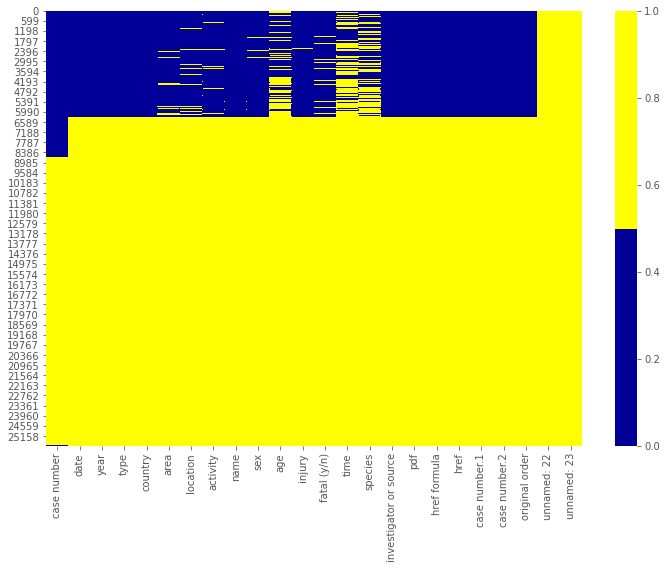

In [7]:
df = first_transformation()

In [8]:
def drop_columns_nans(df=df, max_nan=0, subset=None, keep="first"):
    a = df.shape
    #quitar columnas vacias y duplicadas
    df.dropna(axis=1, how="all", inplace=True)
    df = df.T.drop_duplicates().T
    #quitar filas por condicion Thresh y filas duplicadas
    df = df.dropna(axis=0, thresh=max_nan)
    df.drop_duplicates(subset, keep, inplace=True)
    #columnas estadisticamente irrelevantes
    num_rows = len(df.index)
    low_information_cols = []
    for col in df.columns:
        cnts = df[col].value_counts(dropna=False)
        top_pct = (cnts/num_rows).iloc[0]
        if top_pct > 0.95:
            low_information_cols.append(col)
    df.drop(low_information_cols, axis=1, inplace=True)
    b = df.shape
    columns_dropped = a[1] - b[1]
    rows_dropped = a[0] - b[0]
    print(f"{columns_dropped} columns dropped")
    print(f"{rows_dropped} rows dropped")
    print(f"The new shape is {b[0]} rows and {b[1]} columns")
    return df

In [9]:
df = drop_columns_nans()

2 columns dropped
19411 rows dropped
The new shape is 6312 rows and 22 columns


Aquí un poco de trabajo a mano para quitar columnas que parezcan poco interesantes

In [10]:
def col_to_num(col, type="float64", fill="nan"):
    try:
        df[col] = df[col].str.replace(r"^[[+-]?[0-9]*\.?[0-9]+] | [^\w\s*] | [a-zA-Z]|½|\?|<|>|\"|-|\(|\)|\.|\'| |&", "", regex = True)
    except AttributeError:
        pass
    df[col] = pd.to_numeric(df[col], errors = "coerce")
    #elegir entre median, mean u otro valor
    if fill == "median":
        median = df[col].median()
        df[col].fillna(median, inplace=True)
    elif fill == "mean":
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    else:
        df[col].fillna(fill, inplace=True)
    return df
#ajustar el replace para que solo encaje con digitos y digitos decimales

In [11]:
df = col_to_num("age", fill="median")
df = col_to_num("year", fill="mean")

/home/sam/.local/lib/python3.8/site-packages/pandas/core/strings/object_array.py:160: FutureWarning: Possible nested set at position 2
  compiled = re.compile(pat, flags=flags)


In [12]:
def categorical_search(df=df):
    insta_df = pd.DataFrame()
    df_non_numeric = df.select_dtypes(exclude = [np.number])
    non_numeric_cols = df_non_numeric.columns.values.tolist()
    for col in non_numeric_cols:
        a = df.stb.freq([col], thresh= 0.9*100, other_label = "0ther")
        display(a)
        print("-----------------------------------------------------------------------")

In [13]:
categorical_search()

,case number,count,percent,cumulative_count,cumulative_percent
0,0,8,0.126783,8,0.126783
1,2014.08.02,2,0.031696,10,0.158479
2,2013.10.05,2,0.031696,12,0.190174
3,2012.09.02.b,2,0.031696,14,0.221870
4,2009.12.18,2,0.031696,16,0.253566
...,...,...,...,...,...
5652,1901.06.24,1,0.015848,5676,89.952456
5653,1901.01.30,1,0.015848,5677,89.968304
5654,1901.00.00,1,0.015848,5678,89.984152
5655,1900.12.27,1,0.015848,5679,90.000000


-----------------------------------------------------------------------


,date,count,percent,cumulative_count,cumulative_percent
0,1957,11,0.174548,11,0.174548
1,1942,9,0.142812,20,0.317360
2,1956,8,0.126944,28,0.444303
3,1958,7,0.111076,35,0.555379
4,1950,7,0.111076,42,0.666455
...,...,...,...,...,...
4798,05-mar-2005,1,0.015868,5668,89.939702
4799,05-mar-1999,1,0.015868,5669,89.955570
4800,05-mar-1996,1,0.015868,5670,89.971438
4801,05-mar-1995,1,0.015868,5671,89.987306


-----------------------------------------------------------------------


,type,count,percent,cumulative_count,cumulative_percent
0,unprovoked,4595,72.959670,4595,72.959670
1,provoked,574,9.114004,5169,82.073674
2,0ther,1129,17.926326,6298,100.000000


-----------------------------------------------------------------------


,country,count,percent,cumulative_count,cumulative_percent
0,usa,2229,35.652591,2229,35.652591
1,australia,1338,21.401152,3567,57.053743
2,south africa,579,9.261036,4146,66.314779
3,papua new guinea,134,2.143314,4280,68.458093
4,new zealand,128,2.047345,4408,70.505438
5,brazil,112,1.791427,4520,72.296865
6,bahamas,109,1.743442,4629,74.040307
7,mexico,89,1.423544,4718,75.463852
8,italy,71,1.135637,4789,76.599488
9,fiji,65,1.039667,4854,77.639155


-----------------------------------------------------------------------


,area,count,percent,cumulative_count,cumulative_percent
0,florida,1037,17.735591,1037,17.735591
1,new south wales,486,8.311955,1523,26.047546
2,queensland,311,5.318967,1834,31.366513
3,hawaii,298,5.096631,2132,36.463143
4,california,290,4.959808,2422,41.422952
...,...,...,...,...,...
250,côte d'azur,2,0.034206,5255,89.875150
251,cumberland,2,0.034206,5257,89.909355
252,corfu,2,0.034206,5259,89.943561
253,colón province,2,0.034206,5261,89.977766


-----------------------------------------------------------------------


,location,count,percent,cumulative_count,cumulative_percent
0,"new smyrna beach, volusia county",163,2.828879,163,2.828879
1,"daytona beach, volusia county",30,0.520653,193,3.349531
2,"ponce inlet, volusia county",20,0.347102,213,3.696633
3,"melbourne beach, brevard county",18,0.312392,231,4.009025
4,"myrtle beach, horry county",17,0.295036,248,4.304061
...,...,...,...,...,...
3522,"burkes beach, hilton head, beaufort county",1,0.017355,5182,89.934051
3523,"bundegi sanctuary zone, ningaloo",1,0.017355,5183,89.951406
3524,"bulu, talasea",1,0.017355,5184,89.968761
3525,bulolol,1,0.017355,5185,89.986116


-----------------------------------------------------------------------


,activity,count,percent,cumulative_count,cumulative_percent
0,surfing,971,16.863494,971,16.863494
1,swimming,869,15.092046,1840,31.955540
2,fishing,431,7.485238,2271,39.440778
3,spearfishing,333,5.783258,2604,45.224036
4,bathing,162,2.813477,2766,48.037513
...,...,...,...,...,...
924,he drowned when boat capsized,1,0.017367,5179,89.944425
925,hbm magpie foundered in a squall,1,0.017367,5180,89.961792
926,hauling in net with shark in it,1,0.017367,5181,89.979159
927,hauling in net,1,0.017367,5182,89.996527


-----------------------------------------------------------------------


,name,count,percent,cumulative_count,cumulative_percent
0,male,551,9.044649,551,9.044649
1,female,97,1.592252,648,10.636901
2,boy,23,0.377544,671,11.014445
3,2 males,16,0.262640,687,11.277085
4,boat,14,0.229810,701,11.506894
...,...,...,...,...,...
4608,arthur quick,1,0.016415,5479,89.937623
4609,arthur james kenealey,1,0.016415,5480,89.954038
4610,arthur hopkins,1,0.016415,5481,89.970453
4611,"arthur george reading, naval aviator",1,0.016415,5482,89.986868


-----------------------------------------------------------------------


,sex,count,percent,cumulative_count,cumulative_percent
0,m,5094,88.792052,5094,88.792052
1,0ther,643,11.207948,5737,100.000000


-----------------------------------------------------------------------


,injury,count,percent,cumulative_count,cumulative_percent
0,fatal,804,12.814791,804,12.814791
1,survived,97,1.546063,901,14.360854
2,foot bitten,87,1.386675,988,15.747529
3,no injury,86,1.370736,1074,17.118266
4,leg bitten,72,1.147593,1146,18.265859
...,...,...,...,...,...
3087,extensive injuries to left leg,1,0.015939,5643,89.942620
3088,extensive injuries,1,0.015939,5644,89.958559
3089,erroneously reported on several internet sites...,1,0.015939,5645,89.974498
3090,eight puncture wounds to right leg by captive ...,1,0.015939,5646,89.990437


-----------------------------------------------------------------------


,fatal (y/n),count,percent,cumulative_count,cumulative_percent
0,n,4293,74.492452,4293,74.492452
1,0ther,1470,25.507548,5763,100.000000


-----------------------------------------------------------------------


,time,count,percent,cumulative_count,cumulative_percent
0,afternoon,187,6.343284,187,6.343284
1,11h00,128,4.341927,315,10.685210
2,morning,121,4.104478,436,14.789688
3,12h00,109,3.697422,545,18.487110
4,15h00,108,3.663501,653,22.150611
...,...,...,...,...,...
114,14h35,3,0.101764,2643,89.654003
115,13h50,3,0.101764,2646,89.755767
116,12h50,3,0.101764,2649,89.857531
117,11h40,3,0.101764,2652,89.959294


-----------------------------------------------------------------------


,species,count,percent,cumulative_count,cumulative_percent
0,white shark,164,4.734411,164,4.734411
1,shark involvement prior to death was not confi...,105,3.031178,269,7.765589
2,invalid,102,2.944573,371,10.710162
3,shark involvement not confirmed,89,2.569284,460,13.279446
4,tiger shark,73,2.107390,533,15.386836
...,...,...,...,...,...
1184,4.9 m white shark,1,0.028868,3114,89.896074
1185,4.9 m to 5.5 m [16' to 18'] white shark,1,0.028868,3115,89.924942
1186,4.9 m [16']shark,1,0.028868,3116,89.953811
1187,4.9 m [16'] whaler,1,0.028868,3117,89.982679


-----------------------------------------------------------------------


,investigator or source,count,percent,cumulative_count,cumulative_percent
0,"c. moore, gsaf",105,1.670644,105,1.670644
1,"c. creswell, gsaf",92,1.463803,197,3.134447
2,"s. petersohn, gsaf",82,1.304694,279,4.439141
3,r. collier,55,0.875099,334,5.314240
4,"t. peake, gsaf",48,0.763723,382,6.077963
...,...,...,...,...,...
4330,"canberra times, 11/9/1967",1,0.015911,5653,89.944312
4331,"canberra times, 11/2/1939",1,0.015911,5654,89.960223
4332,"canberra times, 1/9/1931; v.m. coppleson.q8. (...",1,0.015911,5655,89.976134
4333,"canberra times, 1/8/1952",1,0.015911,5656,89.992045


-----------------------------------------------------------------------


,pdf,count,percent,cumulative_count,cumulative_percent
0,1935.06.05.r-solomonislands.pdf,2,0.031736,2,0.031736
1,1934.12.23.a-b-inman.pdf,2,0.031736,4,0.063472
2,1931.09.21.a-b-holaday-barrows.pdf,2,0.031736,6,0.095208
3,1929.03.04.a-b.roads-aldridge.pdf,2,0.031736,8,0.126944
4,1923.00.00.a-nj fisherman.pdf,2,0.031736,10,0.158680
...,...,...,...,...,...
5656,1902.01.22-ogier.pdf,1,0.015868,5668,89.939702
5657,1902.01.19r-soldier-durban.pdf,1,0.015868,5669,89.955570
5658,1902.01.19-jones.pdf,1,0.015868,5670,89.971438
5659,1901.12.01-quince.pdf,1,0.015868,5671,89.987306


-----------------------------------------------------------------------


,href formula,count,percent,cumulative_count,cumulative_percent
0,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031741,2,0.031741
1,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031741,4,0.063482
2,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031741,6,0.095223
3,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031741,8,0.126964
4,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031741,10,0.158705
...,...,...,...,...,...
5655,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015870,5667,89.938105
5656,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015870,5668,89.953976
5657,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015870,5669,89.969846
5658,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015870,5670,89.985717


-----------------------------------------------------------------------


,href,count,percent,cumulative_count,cumulative_percent
0,http://sharkattackfile.net/spreadsheets/pdf_di...,4,0.063472,4,0.063472
1,http://sharkattackfile.net/spreadsheets/pdf_di...,3,0.047604,7,0.111076
2,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031736,9,0.142812
3,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031736,11,0.174548
4,http://sharkattackfile.net/spreadsheets/pdf_di...,2,0.031736,13,0.206284
...,...,...,...,...,...
5650,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015868,5668,89.939702
5651,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015868,5669,89.955570
5652,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015868,5670,89.971438
5653,http://sharkattackfile.net/spreadsheets/pdf_di...,1,0.015868,5671,89.987306


-----------------------------------------------------------------------


,case number.1,count,percent,cumulative_count,cumulative_percent
0,2014.08.02,2,0.031736,2,0.031736
1,2013.10.05,2,0.031736,4,0.063472
2,2012.09.02.b,2,0.031736,6,0.095208
3,2009.12.18,2,0.031736,8,0.126944
4,2006.09.02,2,0.031736,10,0.158680
...,...,...,...,...,...
5650,1901.07.17,1,0.015868,5668,89.939702
5651,1901.06.29.r,1,0.015868,5669,89.955570
5652,1901.06.24,1,0.015868,5670,89.971438
5653,1901.01.30,1,0.015868,5671,89.987306


-----------------------------------------------------------------------


,case number.2,count,percent,cumulative_count,cumulative_percent
0,2014.08.02,2,0.031736,2,0.031736
1,2013.10.05,2,0.031736,4,0.063472
2,2012.09.02.b,2,0.031736,6,0.095208
3,2009.12.18,2,0.031736,8,0.126944
4,2006.09.02,2,0.031736,10,0.158680
...,...,...,...,...,...
5651,1901.06.24,1,0.015868,5668,89.939702
5652,1901.01.30,1,0.015868,5669,89.955570
5653,1901.00.00,1,0.015868,5670,89.971438
5654,1900.12.27,1,0.015868,5671,89.987306


-----------------------------------------------------------------------


,original order,count,percent,cumulative_count,cumulative_percent
0,569.0,2,0.031701,2,0.031701
1,6310.0,1,0.015850,3,0.047551
2,6309.0,1,0.015850,4,0.063401
3,6308.0,1,0.015850,5,0.079252
4,6307.0,1,0.015850,6,0.095102
...,...,...,...,...,...
5673,638.0,1,0.015850,5675,89.950864
5674,637.0,1,0.015850,5676,89.966714
5675,636.0,1,0.015850,5677,89.982565
5676,635.0,1,0.015850,5678,89.998415


-----------------------------------------------------------------------


In [14]:
#pattern = [(df[col].str.contains("something1", case=False, regex=False), "changer1"),
#(df[col].str.contains("something2", case=False, regex=False), "changer2"),
#etc..]

def stand_categorical(col, pattern, other= None):
    df[col] = df[col].astype("category")
    store_criteria, store_values = zip(*pattern)
    df[f"{col}_new"] = np.select(store_criteria, store_values, other)
    df[col] = df[f"{col}_new"].combine_first(df[col])
    return df

In [15]:
pattern = [(df["sex"].str.contains("m", case=False, regex=False, na=False), "m"),
           (df["sex"].str.contains("f", case=False, regex=False, na=False), "f"),
           (df["sex"].str.contains("n", case=False, regex=False, na=False), "n")]

df = stand_categorical("sex", pattern, "other")

In [16]:
df.stb.freq(["sex_new"], style=True)

,sex_new,count,percent,cumulative_count,cumulative_percent
0,m,"5,096",80.74%,"5,096",80.74%
1,f,637,10.09%,"5,733",90.83%
2,other,577,9.14%,"6,310",99.97%
3,n,2,0.03%,"6,312",100.00%


In [17]:
def clean_datetime(col, new_columns=False):
    df[col] = df[col].str.replace(r"^[[+-]?[0-9]*\.?[0-9]+]|[^\w\s*] | ½|\?|<|>|\"|-|\(|\)|\.|\'| |&]|reported", "", regex = True)
    df[col]  = pd.to_datetime(df[col], errors= "coerce")
    df[col] = df[col].astype("datetime64[D]", errors="raise")
    if new_columns:
        df["year"] = df[col].dt.year
        df["month"] = df[col].dt.month
        df["day"] = df[col].dt.day
        df.drop([col], axis = 1, inplace = True)
    return df


In [18]:
df = clean_datetime("date", new_columns=True)

/home/sam/.local/lib/python3.8/site-packages/pandas/core/strings/object_array.py:160: FutureWarning: Possible nested set at position 2
  compiled = re.compile(pat, flags=flags)


In [19]:
def fill_all(df=df, fill="median"):
    df_numeric = df.select_dtypes(include = [np.number])
    df_numeric_columns = df_numeric.columns.tolist()
    df_categoric = df.select_dtypes(include = "category")
    df_categoric_columns = df_categoric.columns.tolist()
    for col in df_numeric_columns:
        if fill == "median":
            median = df[col].median()
            df[col].fillna(median, inplace=True)
        if fill == "mean":
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
    for col in df_categoric_columns:
        mode = df[col].mode()
        df[col].fillna(mode, inplace=True)
    return df


In [20]:
df = fill_all()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             6310 non-null   object 
 1   year                    6312 non-null   float64
 2   type                    6298 non-null   object 
 3   country                 6252 non-null   object 
 4   area                    5847 non-null   object 
 5   location                5762 non-null   object 
 6   activity                5758 non-null   object 
 7   name                    6092 non-null   object 
 8   sex                     6312 non-null   object 
 9   age                     6312 non-null   float64
 10  injury                  6274 non-null   object 
 11  fatal (y/n)             5763 non-null   object 
 12  time                    2948 non-null   object 
 13  species                 3464 non-null   object 
 14  investigator or source  6285 non-null  